## Dataset houses.csv

In [1]:
import pandas as pd
df = pd.read_csv('houses.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Sample (price + sqft_living)

In [56]:
sample = df.sample(30)[['price', 'sqft_living']]

In [57]:
sample

,price,sqft_living
9843,732600.0,2130
3947,304000.0,1280
12771,363500.0,2180
18886,511200.0,1480
2848,306000.0,1560
8976,450000.0,2820
12798,360000.0,2580
2187,330000.0,1680
10596,525000.0,1080
12146,195000.0,1300


## Scatter plot (price x sqft_living)

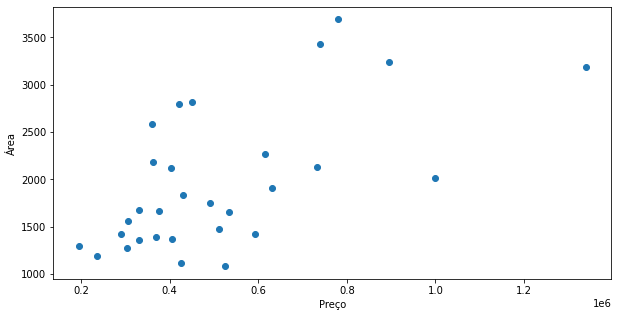

In [58]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.scatter(sample['price'], sample['sqft_living'])
plt.xlabel('Preço')
plt.ylabel('Área')

plt.show()

## Scatter plot (full)

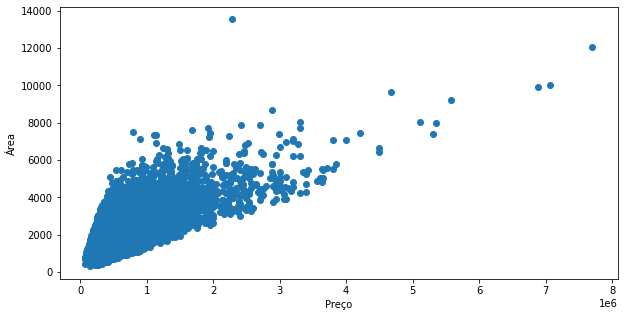

In [59]:
plt.scatter(df['price'], df['sqft_living'])
plt.xlabel('Preço')
plt.ylabel('Área')

plt.show()

## Função de predição

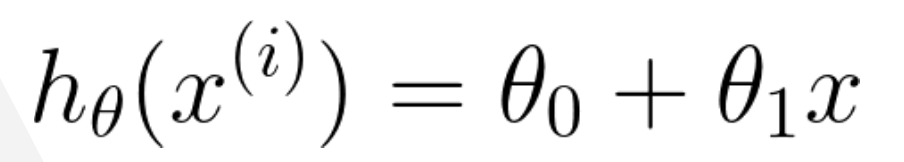

In [60]:
def prediction(t0, t1, x):
    
    hx = t0 * 1 + t1 * x
    
    return hx

## Função de custo

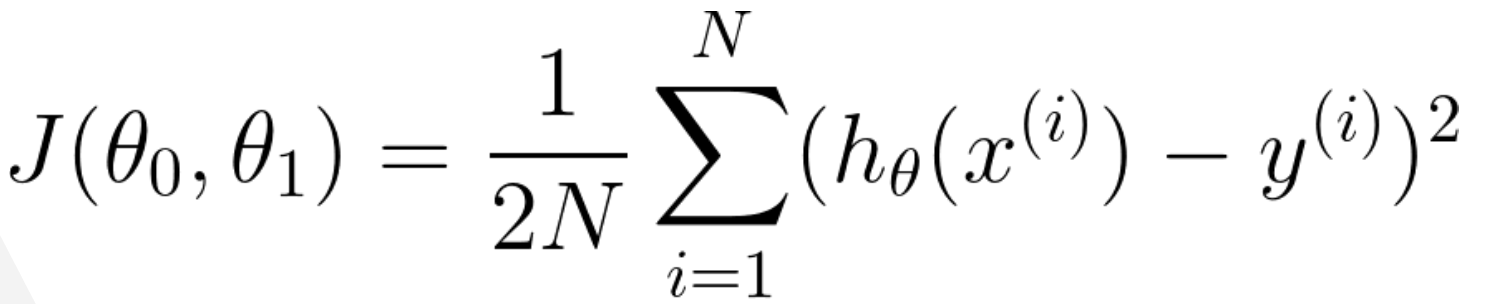

In [61]:
def cost(y, p):
    
    cost = 0
    
    for val in zip(y, p):
        cost += (val[0] - val[1]) ** 2
        
    cost = cost / (2 * (len(y)))
    
    return cost

In [62]:
import numpy as np

a = np.array([1, 5, 6, 7])
b = np.array([6, 4, 1, 9])

print(cost(a, b))

6.875


## Normalização do vetor (cada valor - menor valor / 1000)

In [63]:
def normalize(vector):
    
    menor = np.min(vector)
    
    norm = [(val - menor) / 1000 for val in vector]
    
    return norm

## Inicialização de parâmetros

In [64]:
import matplotlib.pyplot as plt

theta_0 = -100.5
theta_1 = 0.2

use_sample = True


## Scatter plot + predição

In [65]:
src = df

if use_sample:
    src = sample 

In [66]:
nprices = normalize(src['price'])
# nprices

In [67]:
src

,price,sqft_living
9843,732600.0,2130
3947,304000.0,1280
12771,363500.0,2180
18886,511200.0,1480
2848,306000.0,1560
8976,450000.0,2820
12798,360000.0,2580
2187,330000.0,1680
10596,525000.0,1080
12146,195000.0,1300


In [68]:

preds = [prediction(theta_0, theta_1, area) for area in src['sqft_living']]

for res in zip(preds, nprices):
    print(res)

(325.5, 537.6)
(155.5, 109.0)
(335.5, 168.5)
(195.5, 316.2)
(211.5, 111.0)
(463.5, 255.0)
(415.5, 165.0)
(235.5, 135.0)
(115.5, 330.0)
(159.5, 0.0)
(281.3, 435.5)
(458.1, 226.5)
(137.5, 40.0)
(265.5, 236.0)
(233.5, 180.0)
(123.5, 230.0)
(177.5, 175.0)
(547.5, 700.0)
(301.5, 805.0)
(537.5, 1145.0)
(249.5, 296.3)
(173.5, 210.0)
(323.5, 208.95)
(183.5, 95.0)
(637.5, 585.0)
(585.5, 545.0)
(171.5, 134.95)
(183.5, 397.5)
(231.5, 340.0)
(353.5, 420.0)


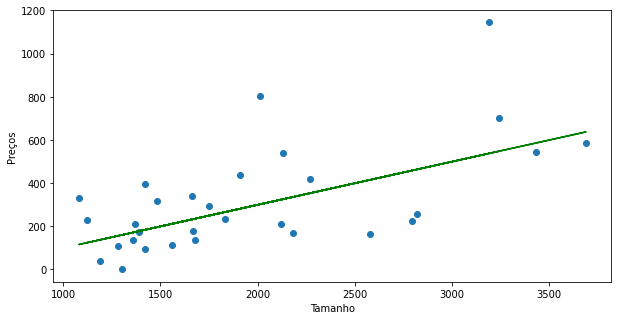

In [69]:
plt.scatter(src['sqft_living'], nprices)
plt.xlabel('Tamanho')
plt.ylabel('Preços')
plt.plot([a for a in src['sqft_living']], preds, 'g')  # Linha de predição
plt.show()

## Qual o custo total?

In [70]:
cost(nprices, preds)

18791.786583333334

## Coletar incrementalmente amostras de custo para o parâmetro T1

In [71]:
start_x = -0.045
theta_1 = start_x
costs, theta_1_vals = [], []
step = 0.01

for i in range(10):
    theta_1 += i * step
    predics = [prediction(theta_0, theta_1, a) for a in src['sqft_living']]
    c = cost(nprices, predics)
    
    costs.append(c)
    theta_1_vals.append(theta_1)

## Normalizar os valores e preparar o gráfico

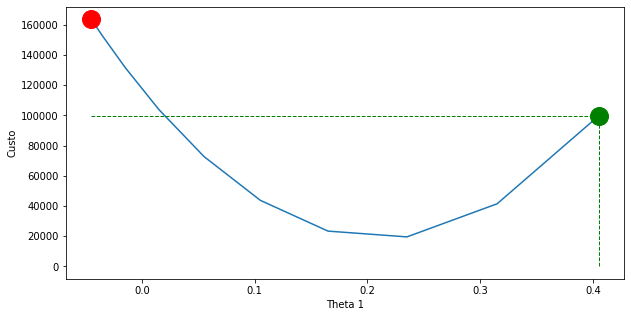

In [74]:
import math


# Aqui vamos plotar o comportamento do custo em função do parâmetro
idx = 0
x = theta_1_vals[idx]
y = costs[idx]

plt.plot(theta_1_vals, costs)
plt.plot(x, y, 'ro', linewidth=1, markersize=18)

x_range = []
for i in range(0, 21):    
    x_range.append(start_x + ( abs(start_x - x) /10*i))
y_range = []
for i in range(0, 21):
    y_range.append(y/10*i)


# Aqui vamos observar o ponto do custo de um determinado momento do parâmetro
qual_indice = 9

x = theta_1_vals[qual_indice]
y = costs[qual_indice]

plt.plot(x, y, 'go', linewidth=1, markersize=18)

x_range = []
for i in range(0, 11):    
    x_range.append(start_x + ( abs(start_x - x) /10*i))
y_range = []
for i in range(0, 11):
    y_range.append(y/10*i)
    
plt.plot(x_range, [y for i in range(0, 11)], 'g--', linewidth=1, markersize=10)
plt.plot([x for i in range(0, 11)], y_range, 'g--', linewidth=1, markersize=10)
plt.xlabel('Theta 1')
plt.ylabel('Custo')
plt.show()

## Inicializar os parâmetros e hiperparâmetros

In [76]:
theta_0 = 0
theta_1 = 0
alpha = 0.0000001
m = len(src)

## Atualizar os parâmetros

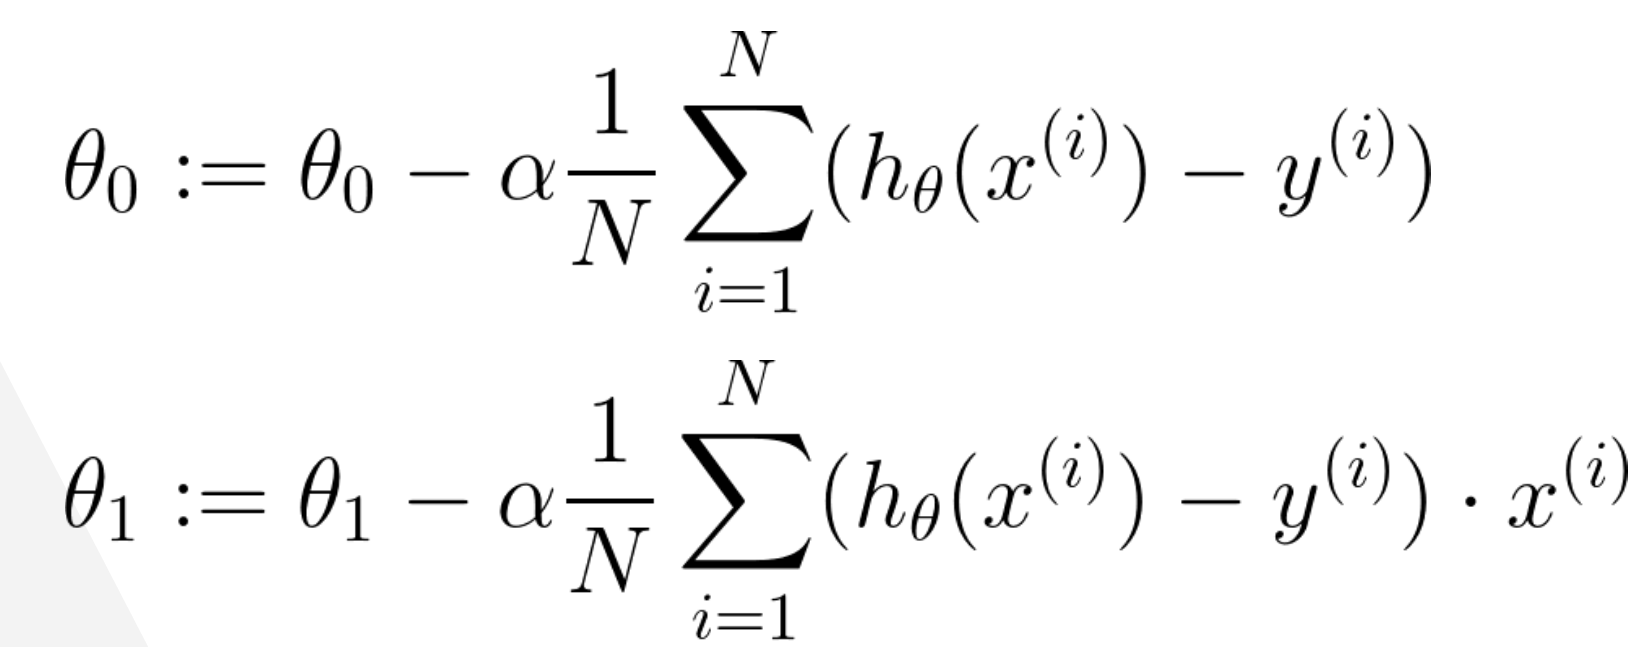

In [ ]:
for i in range(1000):
    
    predics = [prediction(theta_0, theta_1, a) for a in src['sqft_living']]
    
    temp0 = theta_0 - alpha * 1/m * sum(a - y for a, y in zip(predics, src['price']) )
    temp1 = theta_1 - alpha * 1/m * sum( (a - y) * x for a, y, x in zip(predics, src['price'], src['sqft_living']) )
    
    current_cost = cost(predics, src['price'])
    
    predics = [prediction(temp0, temp1, a) for a in src['sqft_living']]
    updated_cost = cost(predics, src['price'])
            
    break


print('T0', temp0, 'T1', temp1)
print('Custo anterior: ', current_cost, 'Novo Custo', updated_cost, current_cost - updated_cost)

## SkLearn

In [ ]:
%pip install sklearn

## Linear Regression + train/test split 

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['sqft_living']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
X_test

,sqft_living
5091,1790
9427,1350
1053,2380
3942,1990
16855,1440
...,...
7231,2420
9315,970
14496,2160
11786,980


In [85]:
lr = LinearRegression().fit(X_train, y_train)



In [86]:
y_pred = lr.predict(X_test)

In [89]:
y_test

,price
7758,480000.0
4487,340000.0
13722,1160000.0
6373,386000.0
9945,1150000.0
...,...
12773,650000.0
13283,415000.0
17677,721500.0
8402,248000.0


In [93]:
vals = zip(y_pred, y_test.values)
MSE = 0
for v in vals:
    MSE += (v[0] - v[1])**2

print(MSE)


[3.71206126e+14]


## Mean Squared Error

In [94]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

68690992939.41044